In [1]:
import numpy as np
import keras as K
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from keras.models import Sequential
import pandas as pd
import gc

np.random.seed(10)

Using TensorFlow backend.
/home/shon/anaconda3/envs/Lee_hw3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/shon/anaconda3/envs/Lee_hw3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/shon/anaconda3/envs/Lee_hw3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/shon/anaconda3/en

In [2]:
train_data=pd.read_csv('train.csv')
train_y=train_data['label'].values
train_x=train_data['feature'].values

train_data

,label,feature
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
...,...,...
28704,2,84 85 85 85 85 85 85 85 86 86 86 87 86 86 91 9...
28705,0,114 112 113 113 111 111 112 113 115 113 114 11...
28706,4,74 81 87 89 95 100 98 93 105 120 127 133 146 1...
28707,0,222 227 203 90 86 90 84 77 94 87 99 119 134 14...


In [3]:
train_y_onehot=np.zeros((train_y.shape[0],7))
for i in range(train_y.shape[0]):
    train_y_onehot[i][train_y[i]]=1

In [4]:
print(train_y_onehot.shape)

(28709, 7)


In [5]:
%%time
train_x_normalization=np.zeros((train_x.shape[0],48*48))
for i in range(train_x.shape[0]):
    train_x_normalization[i]=np.array(train_x[i].split()).astype('float32')/255
print(train_x_normalization.shape)

(28709, 2304)
CPU times: user 24.5 s, sys: 110 ms, total: 24.7 s
Wall time: 24.6 s


In [6]:
train_x=train_x_normalization.reshape(train_x_normalization.shape[0],48,48,1)

# model

In [7]:
model=Sequential()
model.add(Conv2D(32, (3,3), strides=(1, 1),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=None))
model.add(Conv2D(32, (3,3), strides=(1, 1),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=None))
model.add(Flatten())
model.add(Dense(1024))
model.add(Dropout(0.25))
model.add(Dense(1024))
model.add(Dropout(0.25))
model.add(Dense(1024))
model.add(Dropout(0.25))
model.add(Dense(1024))
model.add(Dense(7,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [8]:
%%time
# 未安裝tensorflow-gpu的結果
train_history=model.fit(train_x,train_y_onehot,epochs=30,validation_split=0.2)

Train on 22967 samples, validate on 5742 samples
Epoch 1/30
22967/22967 [==============================] - 213s 9ms/step - loss: 1.8578 - acc: 0.2383 - val_loss: 1.8029 - val_acc: 0.2520
Epoch 2/30
22967/22967 [==============================] - 183s 8ms/step - loss: 1.8087 - acc: 0.2499 - val_loss: 1.7942 - val_acc: 0.2536
Epoch 3/30
22967/22967 [==============================] - 182s 8ms/step - loss: 1.7985 - acc: 0.2552 - val_loss: 1.7682 - val_acc: 0.2828
Epoch 4/30
22967/22967 [==============================] - 183s 8ms/step - loss: 1.7489 - acc: 0.2851 - val_loss: 1.7123 - val_acc: 0.3124
Epoch 5/30
22967/22967 [==============================] - 208s 9ms/step - loss: 1.6892 - acc: 0.3271 - val_loss: 1.7106 - val_acc: 0.3373
Epoch 6/30
22967/22967 [==============================] - 214s 9ms/step - loss: 1.6425 - acc: 0.3539 - val_loss: 1.6163 - val_acc: 0.3685
Epoch 7/30
22967/22967 [==============================] - 218s 9ms/step - loss: 1.5939 - acc: 0.3776 - val_loss: 1.6028 - v

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              4719616   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
__________

In [18]:
test_data=pd.read_csv('test.csv')
test_x=test_data['feature']

print(test_data)

        id                                            feature
0        0  161 176 181 186 166 140 144 123 87 76 86 98 10...
1        1  81 106 120 119 121 129 133 144 151 159 155 164...
2        2  246 247 248 249 247 248 247 247 247 249 250 25...
3        3  166 166 164 162 162 164 169 153 139 84 104 124...
4        4  21 25 36 26 134 255 247 248 248 248 248 248 24...
...    ...                                                ...
7173  7173  253 252 254 240 130 105 105 93 107 111 131 137...
7174  7174  220 216 201 175 190 209 218 227 231 228 228 22...
7175  7175  158 46 30 48 102 156 189 203 204 197 196 201 1...
7176  7176  0 0 0 0 0 1 5 6 21 101 122 130 141 146 151 154...
7177  7177  154 141 77 113 229 215 204 176 120 56 126 162 ...

[7178 rows x 2 columns]


In [19]:
%%time
test_x_normalization=np.zeros((test_x.shape[0],48*48))
for i in range(test_x.shape[0]):
    test_x_normalization[i]=np.array(test_x[i].split()).astype('float32')/255
print(test_x_normalization.shape)


(7178, 2304)
CPU times: user 6.75 s, sys: 189 ms, total: 6.94 s
Wall time: 6.62 s


In [20]:
test_x=test_x_normalization.reshape(test_x_normalization.shape[0],48,48,1)

In [21]:
prediction=model.predict_classes(test_x)
print(prediction)

[3 4 3 ... 3 0 3]


In [22]:
prediction.shape

(7178,)

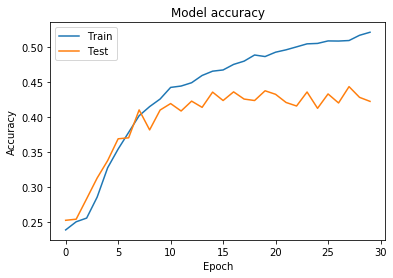

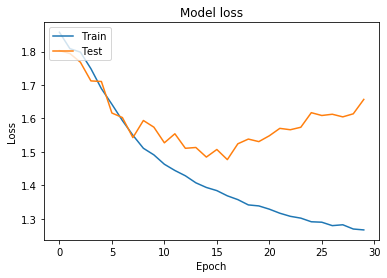

In [23]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('deep_acc.png')
plt.show()

# Plot training & validation loss values
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('deep_loss.png')
plt.show()

In [24]:
model.save('deep_weight.h5')